# Regression Analysis

## Loading the Advertising dataset into a data frame

데이터 출처: https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset

해당 데이터셋은 광고 유형과 광고 비용의 크기에 따른 판매액을 보여주고 있고, 3개의 특성 [TV, 라디오, 신문] 및 타겟 변수 [판매액]으로 구성된 200개의 행을 가지고 있다.

본 팀은 해당 데이터셋으로 광고 매체 (텔레비전, 라디오, 신문)에 대한 광고 비용과 판매액 간의 상관관계를 분석하고, 이를 통해 어떤 광고 매체가 더 효과적인지, 광고 비용이 판매액에 어떤 영향을 미치는지 등을 평가하고자 한다.

Attributes:
   
<pre>
1. TV           TV 광고 비용
2. Radio        라디오 광고 비용
3. Newspaper    신문 광고 비용
4. Sales        판매액
</pre>

In [1]:
# 패키지 및 파일 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('Advertising.csv')
df = df.drop("Unnamed: 0", axis=1)

In [2]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
import matplotlib.pyplot as plt
#seaborn : 통계 데이터 시각화 도구
import seaborn as sns

In [4]:
# 데이터를 독립변수 부분과 종속변수 부분으로 나누기
data_x = df.drop(['Sales'],axis=1)

data_y = df['Sales'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
# 데이터 셋 train과 test로 나누기
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

In [6]:
# train set과 test set의 N,D 정의
N_train, D_train = X_train.shape
N_test, D_test = X_test.shape

# 디자인 매트릭스 정의
Desig_mat_train = np.hstack((np.ones((N_train, 1)), X_train.to_numpy()))
Desig_mat_test = np.hstack((np.ones((N_test,1)), X_test.to_numpy()))

# 계수 추정
xtx = np.matmul(Desig_mat_train.T , Desig_mat_train)
xtx_inv = np.linalg.inv(xtx)
W = np.matmul(np.matmul(xtx_inv , Desig_mat_train.T), y_train)
print(f"예측된 파라미터 값 : {W}")
print(f"즉, 다중선형회귀모델의 식은 다음과 같다")
print(f"-> y_pred = {W[0]:.3f} + {W[1]:.3f}(TV광고비용) + {W[2]:.3f}(Radio광고비용) + {W[3]:.3f}(Newspaper광고비용)")

예측된 파라미터 값 : [2.90794702e+00 4.68431032e-02 1.78544344e-01 2.58618609e-03]
즉, 다중선형회귀모델의 식은 다음과 같다
-> y_pred = 2.908 + 0.047(TV광고비용) + 0.179(Radio광고비용) + 0.003(Newspaper광고비용)


In [7]:
# y의 예측값 구하기
predicted_y_train = np.matmul(Desig_mat_train, W)
residuals = (y_train- predicted_y_train)
# MSE and SSE in training data

print(f"MSE : {(residuals*residuals).mean()}")
print(f"SSE : {(residuals*residuals).sum()}")

MSE : 3.016830607659677
SSE : 482.69289722554834


In [8]:
#predict test data

predicted_y_test = np.matmul(Desig_mat_test, W)
residuals_test = (y_test - predicted_y_test)

# MSE and SSE in test data

print(f"MSE : {(residuals_test*residuals_test).mean()}")
print(f"SSE : {(residuals_test*residuals_test).sum()}")

MSE : 1.991885551828797
SSE : 79.67542207315188


# Linear Regression with sklearn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# 학습한 weight 확인
print(W)
model.coef_
# 동일한 것을 알 수 있다.

[2.90794702e+00 4.68431032e-02 1.78544344e-01 2.58618609e-03]


array([0.0468431 , 0.17854434, 0.00258619])

In [12]:
# 학습한 모델의 절편 확인
model.intercept_

2.9079470208164313

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
#성능 계산 
print('MSE score in Training data : ', mean_squared_error(y_train_pred,y_train))
print('R2 in Training data : ', r2_score(y_train_pred,y_train))

MSE score in Training data :  3.016830607659678
R2 in Training data :  0.8838504200706788


In [15]:
#성능 계산 
print('MSE score in Test data : ', mean_squared_error(y_test_pred,y_test))
print('R2 in Test data : ', r2_score(y_test_pred,y_test))

MSE score in Test data :  1.9918855518287901
R2 in Test data :  0.8832957189120245


## 정리
* Linear regression의 일반식 (X^TX)^-1X^Ty를 이용한 모델의 R2값은 충분히 높아보인다. 그러나 더 높은 test R2값을위해 각 변수를 n 제곱하여 R2값의 변화를 관찰해보았다.

## Modeling nonlinear relationships in the Advertising Dataset

### X: TV, Y: Sales

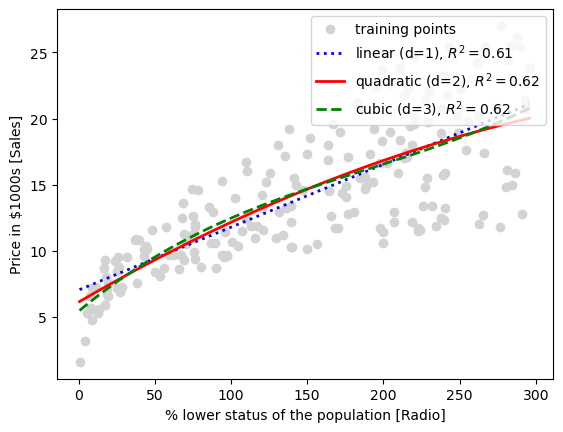

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['TV']].values
y = df['Sales'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [Radio]')
plt.ylabel('Price in $1000s [Sales]')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

### X: Radio, Y: Sales

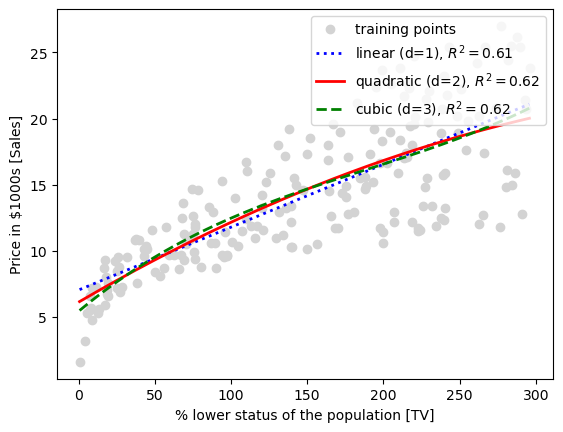

In [17]:
X = df[['TV']].values
y = df['Sales'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [TV]')
plt.ylabel('Price in $1000s [Sales]')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

### X: Newspaper, Y: Sales

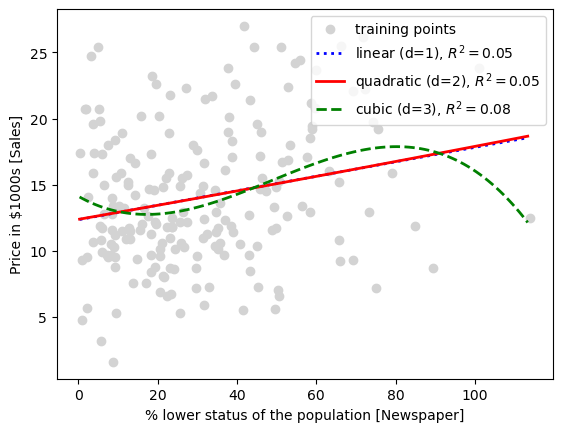

In [18]:
X = df[['Newspaper']].values
y = df['Sales'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [Newspaper]')
plt.ylabel('Price in $1000s [Sales]')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

* 각 변수 TV, Radio, Newspaper별로 차수를 증가시켰음에도 불구하고, R2의 유의미한 증가가 관측되지 않는 것으로 보인다. 따라서, 회귀모델의 정규화(Ridge / Lasso regression)를 이용해 추가적인 분석을 진행하기로 하였다

# Using regularized methods for regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['Sales'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# alpha를 바꿔가면서 ridge, lasso 수행
for a in range(11):

    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    print(lasso.coef_)

    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    print(ridge.coef_)
    
    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    print("========================================")

[0.04391531 0.20027962 0.00184368]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04391531 0.20027962 0.00184368]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04385471 0.19658799 0.00032686]
MSE train: 2.492, test: 3.608
R^2 train: 0.906, test: 0.868
[0.04391529 0.20027289 0.00184511]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04376116 0.19243236 0.        ]
MSE train: 2.505, test: 3.547
R^2 train: 0.906, test: 0.870
[0.04391526 0.20026617 0.00184654]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04365848 0.1881509  0.        ]
MSE train: 2.527, test: 3.496
R^2 train: 0.905, test: 0.872
[0.04391523 0.20025945 0.00184797]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04355579 0.18386945 0.        ]
MSE train: 2.558, test: 3.452
R^2 train: 0.904, test: 0.874
[0.0439152  0.20025272 0.0018494 ]
MSE train: 2.486, test: 3.691
R^2 train: 0.907, test: 0.865
[0.04345311 0.179588   0.        ]
MSE train: 2.59

C:\Users\sangjunlee\AppData\Local\Temp\ipykernel_8616\379131464.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\sangjunlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sangjunlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+02, tolerance: 3.726e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_

## Ridge / Lasso 회귀분석 결과
* 3번째 변수인 Newspaper의 가중치가 가장 낮고 2번째 변수인 Radio의 가중치가 가장 높다. 이를 통해 Newspaper 광고 비용이 Sales에 거의 영향을 주지 않고, Radio 광고 비용이 Sales 증가에 가장 큰 영향을 준다는 것을 의미한다.
* 하지만, 여전히 처음에 일반식을 이용하여 구한 R2값보다 낮은 것을 볼 수 있다. 이를 KNN을 사용하여 해결해보고자 한다.

# knn 사용

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

### knn regression을 이용하여 k값을 증가 시키며 test 데이터셋에 대한 R2 score와 accuracy를 구하였다. 

#### KNN regression이 가지는 특징
* 입력 데이터를 기반으로 가장 가까운 이웃들의 평균 값을 사용하여 연속적인 출력 값을 예측한다.
* 이웃들의 연속적인 값을 평균하여 해당 데이터 포인트의 예측 값으로 사용한다.
* KNN Regressor는 수치형 데이터에 적합하며, 연속적인 값을 예측하는 데 사용된다.

In [22]:
r2_scores = []
for each in range(1,15):

    knn2= KNeighborsRegressor(n_neighbors=each)
    knn2.fit(X_train, y_train)
    y_pred=knn2.predict(X_test)
    print(f"R2 score (k = {each}일 때):{r2_score(y_test, y_pred)}")
    r2_scores.append(r2_score(y_test, y_pred))

R2 score (k = 1일 때):0.8133970148771599
R2 score (k = 2일 때):0.8974349828777898
R2 score (k = 3일 때):0.905828124213108
R2 score (k = 4일 때):0.8756221249172659
R2 score (k = 5일 때):0.8610900675029299
R2 score (k = 6일 때):0.846411383416186
R2 score (k = 7일 때):0.8445734168468144
R2 score (k = 8일 때):0.839399573534652
R2 score (k = 9일 때):0.8299067124239324
R2 score (k = 10일 때):0.8095704692431132
R2 score (k = 11일 때):0.7957511203164438
R2 score (k = 12일 때):0.765946828333621
R2 score (k = 13일 때):0.7632154106157805
R2 score (k = 14일 때):0.7480552329025131


R2 score (k = 1일 때): 0.8133970148771599
R2 score (k = 2일 때): 0.8974349828777898
R2 score (k = 3일 때): 0.905828124213108
R2 score (k = 4일 때): 0.8756221249172659
R2 score (k = 5일 때): 0.8610900675029299
R2 score (k = 6일 때): 0.846411383416186
R2 score (k = 7일 때): 0.8445734168468144
R2 score (k = 8일 때): 0.839399573534652
R2 score (k = 9일 때): 0.8299067124239324
R2 score (k = 10일 때): 0.8095704692431132
R2 score (k = 11일 때): 0.7957511203164438
R2 score (k = 12일 때): 0.765946828333621
R2 score (k = 13일 때): 0.7632154106157805
R2 score (k = 14일 때): 0.7480552329025131


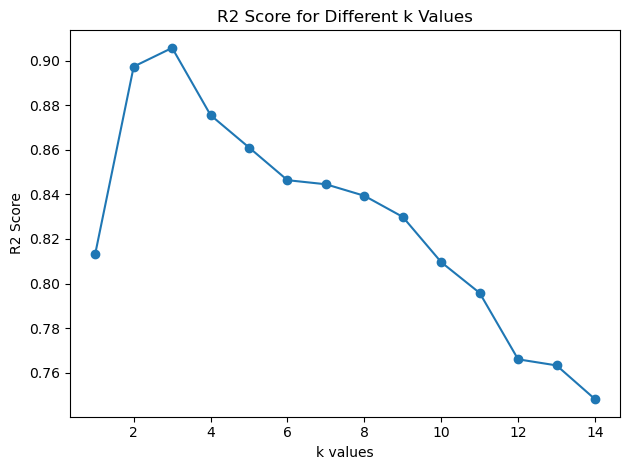

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

r2_scores = []

for each in range(1, 15):
    knn2 = KNeighborsRegressor(n_neighbors=each)
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score (k = {each}일 때): {r2}")
    r2_scores.append(r2)

plt.plot(range(1, 15), r2_scores, marker='o')
plt.xlabel('k values')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different k Values')

plt.tight_layout()
plt.show()

## KNN regression을 사용 결과
* k = 3 일 때, R2_test는 약 0.9058로 현재까지 이용한 방법 중 가장 높았다.
* KNN regression 특성 상, 직접적인 parameter를 구할 수 없어 어떤 요소가 sales에 유의미한 영향을 주는 지는 파악할 수 없다.